# Lab1 (Student version)
## Students:
## Jack Thay - 21201079
## Thierry Ung - 3804472

We can use the following libraries.

In [1]:
import matplotlib.pyplot as plt
import math
import sys
print(sys.version)

3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]


## Exercise 1: getting things started with undirected graphs

### Question 1

Create manually an undirected graph (with approximately a dozen nodes) _test_graph.txt_ and store it in a text file in the format (for each line):

x    y 

Where x and y are separated with a tabulation. You will use them to test your codes.

### Question 2

Download the following graphs (be careful these datasets are quite heavy):

http://snap.stanford.edu/data/com-Amazon.html

http://snap.stanford.edu/data/com-LiveJournal.html

Also, download _graph.txt_ and _bugged_graph.txt_ from https://moodle-sciences-23.sorbonne-universite.fr

These datasets allow you to check the results of your programs.


### Question 3

Make a program which reads a graph from a text file and counts the number of nodes and edges in a graph (without storing the graph in memory). 

In [2]:
def read_nodes_edges(graph):
    with open(graph, 'r') as file: #opening file
        nodes = set() #creating a list
        edges = 0 #initializing edges to 0
        for line in file:
            if line.strip(): # In case there's an empty line
                edge_info = line.strip().split() # splitting line
                nodes.add(edge_info[0])
                nodes.add(edge_info[1])
                edges += 1 #incrementing edge count

    num_nodes = len(nodes) #final count for nodes
    num_edges = edges #final count for edges
    print(f"For {graph}, number of nodes and edges: [{num_nodes}] [{num_edges}]")

In [6]:
read_nodes_edges("test_graph.txt")
# Answer should be 16 nodes and 15 edges

For test_graph.txt, number of nodes and edges: [16] [15]


In [4]:
read_nodes_edges("graph.txt")
# Answer should be 10 nodes and 15 edges

For graph.txt, number of nodes and edges: [10] [15]


### Question 3bis

Apply the previous code to _bugged_graph.txt_ and then look at the content of the file. Does it correspond to the expected result? Explain in one sentence what the problem is.

In [5]:
read_nodes_edges("bugged_graph.txt")

For bugged_graph.txt, number of nodes and edges: [10] [18]


Answer: The number of edges is wrong, our function isn't able to see redundant links, since it's not storing anything in memory. If a same link appears several times, it will be counted as many times.

### Question 4

Make a program which counts the degree (i.e. the number of edges) of a node of a graph (without storing it in memory).

In [7]:
def count_node_degree(filename, target_node):
    degree = 0
    with open(filename, 'r') as file:
        for line in file:
            if line.strip(): # In case there's an empty line
                edge_info = line.strip().split()
                if target_node in edge_info:
                    degree += 1 #incrementing degree count
    print(f"Node {target_node} from {filename}, degree: {degree}")
    # Code new message if the motherfucker gave us a node that doesn't exist

In [8]:
count_node_degree("test_graph.txt", "1")
# Answer should be 15 for node 1

Node 1 from test_graph.txt, degree: 15


In [9]:
count_node_degree("graph.txt", "1")
# Answer should be 4 for node 1

Node 1 from graph.txt, degree: 4


Sidenote: bugged_graph.txt not tested, since our code can't detect duplicates.

## Exercise 2: loading a graph in memory

### Question 5

Make a program which reads a graph from a text file and load it as a python **dictionary of lists**. 
This implementation of the adjacency list format will be the standard format that we will use to store a graph in this course.

In [32]:
def load_graph(filename):
    adjacency_list = {}
    with open(filename, 'r') as file:
        for line in file:
            if line.strip(): # Skip empty lines
                edge_info = line.strip().split()
                node1, node2 = edge_info[0], edge_info[1]

                if node1 not in adjacency_list:
                    adjacency_list[node1] = []

                if node2 not in adjacency_list:
                    adjacency_list[node2] = []

                adjacency_list[node1].append(node2)
                adjacency_list[node2].append(node1)

    return adjacency_list

# Example usage
filename = 'test_graph.txt'
adj_list1 = load_graph(filename)
print(adj_list1)

{'2': ['1'], '1': ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'], '3': ['1'], '4': ['1'], '5': ['1'], '6': ['1'], '7': ['1'], '8': ['1'], '9': ['1'], '10': ['1'], '11': ['1'], '12': ['1'], '13': ['1'], '14': ['1'], '15': ['1'], '16': ['1']}


### Question 6

Make a program that deletes the self-loops and duplicated edges existing in the graph and writes it in a new text file. 

Use it on _bugged_graph.txt_ to create a graph _clean_graph.txt_ without self-loops and duplicated edges.

In [11]:
def clean_graph(input_filename, output_filename):
    cleaned_edges = set()
    with open(input_filename, 'r') as file:
        for line in file:
            if line.strip():  # Skip empty lines
                edge_info = line.strip().split()
                if edge_info[0] != edge_info[1]:
                    cleaned_edges.add((edge_info[0], edge_info[1]))

    with open(output_filename, 'w') as output_file:
        for edge in cleaned_edges:
            output_file.write(f"{edge[0]} {edge[1]}\n")

In [12]:
input_filename = 'bugged_graph.txt'
output_filename = 'clean_graph.txt'
clean_graph(input_filename, output_filename)

In [13]:
read_nodes_edges("clean_graph.txt")

For clean_graph.txt, number of nodes and edges: [10] [16]


### Question 7

Try the data structure of Question 5 on the two graphs downloaded in Question 2, can you load them in memory? Can you print them on the screen?

Conclude on the scalability (meaning what graph size can you handle with this data structure).

## Exercise 3: degree distribution

### Question 8
Create a program which computes the degree distribution of a graph, store it in a python dictionary of the form:

deg: number of occurrences

In [18]:
def compute_degree_distribution(adjacency_list):
    degree_distribution = {}
    for node, neighbors in adjacency_list.items():
        degree = len(neighbors)
        if degree in degree_distribution:
            degree_distribution[degree] += 1
        else:
            degree_distribution[degree] = 1
    return degree_distribution

In [9]:
adjacency_list = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C'],
    'C': ['A', 'B', 'D'],
    'D': ['A', 'C']
}

degree_distribution = compute_degree_distribution(adjacency_list)
print(degree_distribution)

{3: 2, 2: 2}


In [35]:
degree_distribution = compute_degree_distribution(adj_list1)
print(degree_distribution)

{1: 15, 15: 1}


### Question 9

Plot the degree distribution in logarithmic scale (using matplotlib for example). Be careful to choose an adequate plotting style.

In [19]:
def plot_degree_distribution(adjacency_list):
    degree_distribution = compute_degree_distribution(adjacency_list)

    plt.figure(figsize=(10, 6))
    plt.bar(degree_distribution.keys(), degree_distribution.values(), color='skyblue')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Number of Nodes (log scale)')
    plt.title('Degree Distribution')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

In [16]:
adjacency_list = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C'],
    'C': ['A', 'B', 'D'],
    'D': ['A', 'C']
}

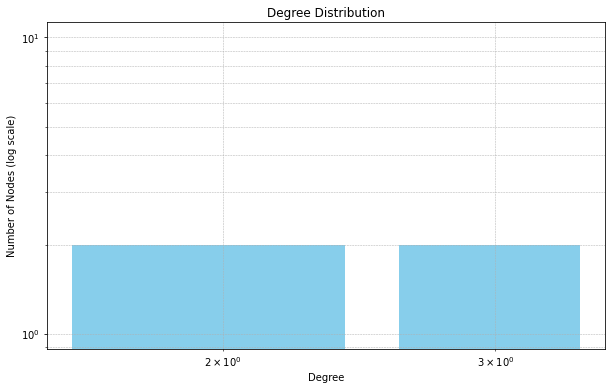

In [20]:
plot_degree_distribution(adjacency_list)

## Exercise 3: the case of directed graphs

### Question 10

Download the following directed graph:

http://konect.cc/networks/web-Google/

By adapting your codes for undirected graphs to directed graphs, load it in memory into a double ajacency list format.

In [23]:
def load_directed_graph(filename):
    adjacency_list = {}
    reverse_adjacency_list = {}

    with open(filename, 'r') as file:
        for line in file:
            if line.strip():  # Skip empty lines
                edge_info = line.strip().split()
                node1, node2 = edge_info[0], edge_info[1]

                if node1 not in adjacency_list:
                    adjacency_list[node1] = []
                    reverse_adjacency_list[node1] = []

                if node2 not in adjacency_list:
                    adjacency_list[node2] = []
                    reverse_adjacency_list[node2] = []

                adjacency_list[node1].append(node2)
                reverse_adjacency_list[node2].append(node1)

    return adjacency_list, reverse_adjacency_list

In [24]:
load_directed_graph("web-Google.txt")

({'#': ['Directed', 'Webgraph', 'Nodes:', 'FromNodeId'],
  'Directed': [],
  'Webgraph': [],
  'Nodes:': [],
  'FromNodeId': [],
  '0': ['11342', '824020', '867923', '891835'],
  '11342': ['0',
   '27469',
   '38716',
   '309564',
   '322178',
   '387543',
   '427436',
   '538214',
   '638706',
   '645018',
   '835220',
   '856657',
   '867923',
   '891835'],
  '824020': ['0',
   '91807',
   '322178',
   '387543',
   '417728',
   '438493',
   '500627',
   '535748',
   '695578',
   '867923',
   '891835'],
  '867923': ['0',
   '11342',
   '136593',
   '414038',
   '500627',
   '523684',
   '760842',
   '815602',
   '835220',
   '846213',
   '857527',
   '891835'],
  '891835': ['0',
   '11342',
   '112028',
   '235849',
   '302284',
   '417728',
   '451592',
   '693969',
   '857527',
   '867923'],
  '27469': ['227142',
   '316308',
   '316420',
   '417728',
   '435804',
   '588022',
   '659942',
   '720341',
   '828241'],
  '38716': ['0',
   '3501',
   '11342',
   '136593',
   '322178',
 

### Question 11

Plot in log-log scale both the in-degree distribution and the out-degree distribution of this graph.

In [29]:
def compute_degree_distribution_directed(adjacency_list, reverse_adjacency_list):
    in_degree_distribution = {}
    out_degree_distribution = {}

    for node, out_neighbors in adjacency_list.items():
        out_degree = len(out_neighbors)
        if out_degree in out_degree_distribution:
            out_degree_distribution[out_degree] += 1
        else:
            out_degree_distribution[out_degree] = 1

    for node, in_neighbors in reverse_adjacency_list.items():
        in_degree = len(in_neighbors)
        if in_degree in in_degree_distribution:
            in_degree_distribution[in_degree] += 1
        else:
            in_degree_distribution[in_degree] = 1

    return in_degree_distribution, out_degree_distribution

In [27]:
filename = 'web-Google.txt'
adj_list, reverse_adj_list = load_directed_graph(filename)

In [30]:
in_degree_dist, out_degree_dist = compute_degree_distribution_directed(adj_list, reverse_adj_list)
print("\nIn-Degree Distribution:")
print(in_degree_dist)
print("\nOut-Degree Distribution:")
print(out_degree_dist)


In-Degree Distribution:
{0: 161169, 1: 286899, 212: 11, 200: 13, 4: 36633, 208: 16, 206: 29, 22: 2234, 75: 136, 9: 14154, 13: 7552, 2: 114542, 21: 2859, 5: 27869, 6: 23752, 1158: 1, 2496: 1, 58: 264, 29: 1231, 20: 3744, 40: 572, 3: 58863, 61: 210, 11: 10037, 96: 62, 103: 75, 2042: 1, 95: 84, 97: 72, 99: 90, 7: 19255, 18: 4858, 25: 1604, 33: 845, 31: 1077, 17: 5230, 10: 11523, 23: 2001, 159: 17, 55: 294, 106: 84, 15: 6207, 24: 1885, 14: 6768, 105: 70, 44: 545, 5354: 1, 47: 391, 51: 324, 516: 1, 156: 19, 56: 253, 104: 43, 78: 147, 53: 404, 543: 1, 187: 10, 3988: 1, 229: 6, 86: 70, 12: 8739, 37: 782, 27: 1446, 399: 1, 102: 52, 299: 6, 8: 15987, 182: 25, 35: 869, 124: 31, 45: 489, 52: 344, 30: 1137, 3370: 1, 19: 4230, 48: 346, 34: 866, 32: 932, 126: 32, 16: 5726, 28: 1293, 88: 84, 71: 176, 36: 906, 38: 711, 216: 1, 189: 14, 83: 74, 26: 1630, 147: 24, 60: 224, 1955: 1, 415: 4, 116: 44, 161: 14, 160: 24, 158: 13, 157: 24, 57: 261, 386: 1, 3810: 1, 175: 11, 125: 36, 79: 97, 87: 102, 110: 36,